<a href="https://colab.research.google.com/github/charleseleri/predict-bitcoin-price/blob/main/BTC_PredictBitcoinPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=f97cccd3f470b5b98a4208461b015c7ecfb8b4fb41e577812eb8ce9d7a6c4f41
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


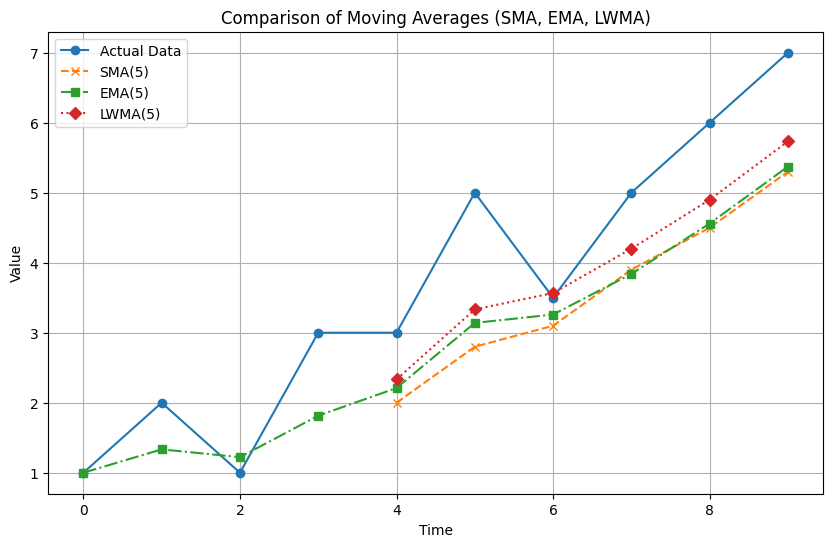

In [1]:
!pip install yfinance ta xgboost statsmodels tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = [1, 2, 1, 3, 3, 5, 3.5, 5, 6, 7]
n = len(data)

# Simple Moving Average (SMA) with window size of 5
window_size = 5
SMA = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponentially Weighted Moving Average (EMA) with window size of 5
alpha = 2 / (window_size + 1)  # standard EMA factor
EMA = [data[0]]  # initialize with the first value
for i in range(1, n):
    ema_value = alpha * data[i] + (1 - alpha) * EMA[-1]
    EMA.append(ema_value)

# Linear Weighted Moving Average (LWMA)
weights = np.arange(1, window_size+1)  # linear weights: 1, 2, 3, 4, 5
LWMA = np.array([np.dot(data[i-window_size+1:i+1], weights)/weights.sum()
                for i in range(window_size-1, n)])

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data, label='Actual Data', marker='o')

# Plot SMA
plt.plot(np.arange(window_size-1, n), SMA, label='SMA(5)', linestyle='--', marker='x')

# Plot EMA
plt.plot(EMA, label='EMA(5)', linestyle='-.', marker='s')

# Plot LWMA
plt.plot(np.arange(window_size-1, n), LWMA, label='LWMA(5)', linestyle=':', marker='D')

# Add labels and title
plt.title('Comparison of Moving Averages (SMA, EMA, LWMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.savefig('MAs.png', dpi=300)
#plt.show()



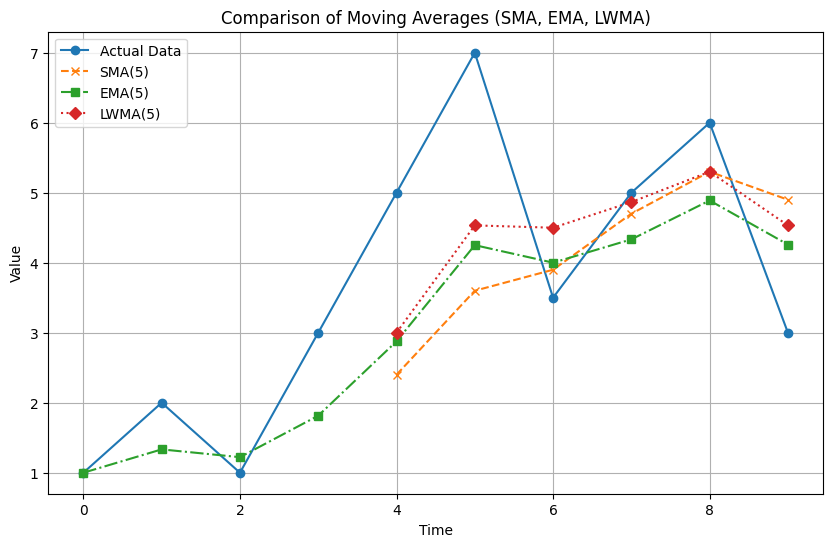

In [ ]:
# Data with big drop
data = [1, 2, 1, 3, 5, 7, 3.5, 5, 6, 3]
n = len(data)

# Simple Moving Average (SMA) with window size of 5
window_size = 5
SMA = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponentially Weighted Moving Average (EMA) with window size of 5
alpha = 2 / (window_size + 1)  # standard EMA factor
EMA = [data[0]]  # initialize with the first value
for i in range(1, n):
    ema_value = alpha * data[i] + (1 - alpha) * EMA[-1]
    EMA.append(ema_value)

# Linear Weighted Moving Average (LWMA)
weights = np.arange(1, window_size+1)  # linear weights: 1, 2, 3, 4, 5
LWMA = np.array([np.dot(data[i-window_size+1:i+1], weights)/weights.sum()
                for i in range(window_size-1, n)])

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data, label='Actual Data', marker='o')

# Plot SMA
plt.plot(np.arange(window_size-1, n), SMA, label='SMA(5)', linestyle='--', marker='x')

# Plot EMA
plt.plot(EMA, label='EMA(5)', linestyle='-.', marker='s')

# Plot LWMA
plt.plot(np.arange(window_size-1, n), LWMA, label='LWMA(5)', linestyle=':', marker='D')

# Add labels and title
plt.title('Comparison of Moving Averages (SMA, EMA, LWMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.savefig('MA2s.png', dpi=300)
#plt.show()

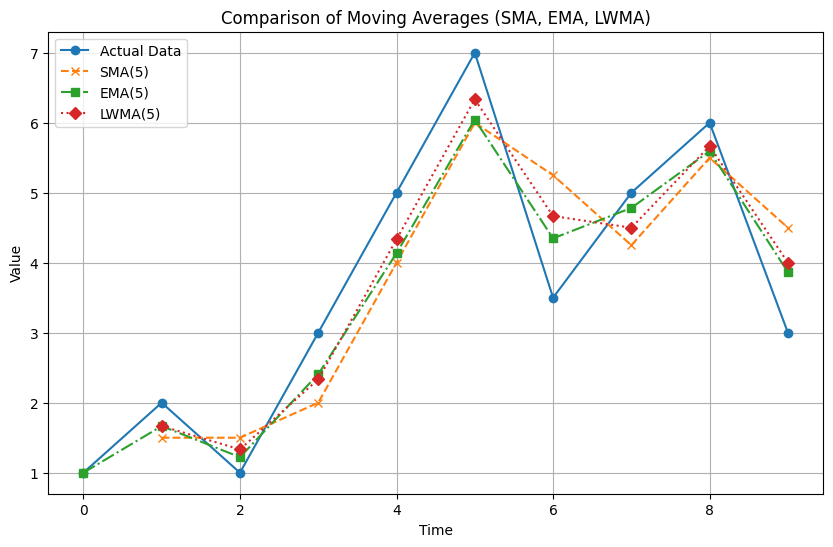

In [ ]:
# Data with big drop
data = [1, 2, 1, 3, 5, 7, 3.5, 5, 6, 3]
n = len(data)

# Simple Moving Average (SMA) with window size of 2
window_size = 2
SMA = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponentially Weighted Moving Average (EMA) with window size of 5
alpha = 2 / (window_size + 1)  # standard EMA factor
EMA = [data[0]]  # initialize with the first value
for i in range(1, n):
    ema_value = alpha * data[i] + (1 - alpha) * EMA[-1]
    EMA.append(ema_value)

# Linear Weighted Moving Average (LWMA)
weights = np.arange(1, window_size+1)  # linear weights: 1, 2, 3, 4, 5
LWMA = np.array([np.dot(data[i-window_size+1:i+1], weights)/weights.sum()
                for i in range(window_size-1, n)])

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data, label='Actual Data', marker='o')

# Plot SMA
plt.plot(np.arange(window_size-1, n), SMA, label='SMA(5)', linestyle='--', marker='x')

# Plot EMA
plt.plot(EMA, label='EMA(5)', linestyle='-.', marker='s')

# Plot LWMA
plt.plot(np.arange(window_size-1, n), LWMA, label='LWMA(5)', linestyle=':', marker='D')

# Add labels and title
plt.title('Comparison of Moving Averages (SMA, EMA, LWMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.savefig('MA2days.png', dpi=300)
#plt.show()

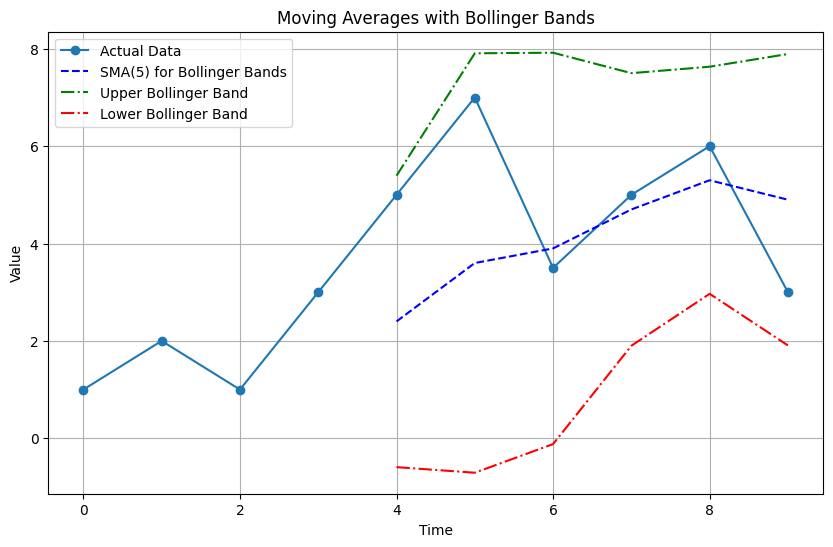

In [ ]:
window_size = 5
# Bollinger Bands Calculation (using SMA and standard deviation)
def bollinger_bands(data, window_size, num_std_dev=2):
    SMA = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    rolling_std = np.array([np.std(data[i-window_size+1:i+1]) for i in range(window_size-1, n)])
    upper_band = SMA + num_std_dev * rolling_std
    lower_band = SMA - num_std_dev * rolling_std
    return SMA, upper_band, lower_band

# Calculate Bollinger Bands with window size of 5 and 2 standard deviations
SMA_bollinger, upper_band, lower_band = bollinger_bands(data, window_size)

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(data, label='Actual Data', marker='o')

# Plot SMA (for Bollinger Bands)
plt.plot(np.arange(window_size-1, n), SMA_bollinger, label='SMA(5) for Bollinger Bands', linestyle='--', color='blue')

# Plot Bollinger Bands
plt.plot(np.arange(window_size-1, n), upper_band, label='Upper Bollinger Band', linestyle='-.', color='green')
plt.plot(np.arange(window_size-1, n), lower_band, label='Lower Bollinger Band', linestyle='-.', color='red')

# Plot EMA (previously calculated)
#plt.plot(EMA, label='EMA(5)', linestyle='-.', marker='s')

# Add labels and title
plt.title('Moving Averages with Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.savefig('MA_boll.png', dpi=300)
#plt.show()
